In [2]:
# 从数据库中读取数据包
from pyspark.sql import SparkSession
import os
from pytoolkit import TDWSQLProvider
import pandas

In [3]:
# 从数据库中读取作者侧数据
os.environ['GROUP_ID'] = 'g_wxg_wxt_product_analytics_intern'
os.environ['GAIA_ID'] = '5729'
session = SparkSession.builder.config('spark.driver.maxResultSize','14g').config('spark.driver.memory', '14g').config('spark.executor.cores', 4).config('spark.executor.memory', '14g').config('spark.yarn.archive','hdfs://qy-ieg-4-v2/data/SPARK/cachefile/3_12_2.4.6_hadoop3/spark-jars_old_notauth.zip').getOrCreate()
tdw = TDWSQLProvider(session, group='tl', db='wxg_weixin_analytics_intern')
df=tdw.table('tmp_dws_app_bilateral_expt13172784_finder_intern_uin_i').toPandas()
# tbl=tdw.table('tmp_dws_app_bilateral_expt13172784_finder_intern_uin_i')
# tbl.creatOrReplaceTempView('tbl')
# sql='''select * from tbl where ds='20220620' '''
# tbl1=session.sql(sql)
df.head(5)

Driver Log: 759a8707-6e2d-4ce4-8fce-5dfee678cff4.log
Tracking URL: http://application.tdw.oa.com:8080/proxy/application_1664996746409_1910772


,ds,groupid,first_hit_ds,finder_staytime,rec_staytime,finder_acitve,rec_acitve,post_cnt,end_like_count,end_follow_count,...,reach_min_vv_count,follow_target_end_vv_count,like_target_end_vv_count,product_target_end_vv_count,end_vv_count,load_vv_count,end_cost,load_cost,promotion_count,anonymous
0,20220624,297400,20220618,3.069276,0.999512,1.410709,1.717451,3.99715,4.501024,5.565885,...,6.862463,5.47633,9.345429,5.599215,0.300717,4.190627,5.422563,5.043877,6.874177,76ca2c2c90a1243821aea3ed85aab09c
1,20220624,297400,20220619,3.069276,0.999512,1.410709,1.717451,3.99715,4.501024,5.565885,...,6.862463,5.47633,9.345429,5.599215,0.300717,4.190627,5.422563,5.043877,6.874177,07deb052a65ef98c352fb0a0c5652d8b
2,20220624,297402,20220619,4447.886973,2944.588342,9.937973,6.374503,3.99715,4.501024,5.565885,...,6.862463,5.47633,9.345429,5.599215,0.300717,4.190627,5.422563,5.043877,6.874177,0ef61409ebfee745bd980d43c0e75b18
3,20220624,297402,20220618,38621.357672,43.450465,9.937973,6.374503,3.99715,4.501024,5.565885,...,6.862463,5.47633,9.345429,5.599215,0.300717,4.190627,5.422563,5.043877,6.874177,73ce8b09e82ba261ba55febc4878d1ab
4,20220624,297400,20220619,48.561018,8.484699,9.937973,6.374503,3.99715,4.501024,5.565885,...,6.862463,5.47633,9.345429,5.599215,0.300717,4.190627,5.422563,5.043877,6.874177,214d3c246c95b1886414f9c45b3380a3


In [17]:
# 数据分析包
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
# 
from metric_funcs import Ttest, Metric
from frt_pvalue import sharp_null_hypothesis_pvalue

# 作者侧数据分析

### 1. 整体数据分析

In [6]:
# 1. 查看整体数据
df.head(5)

,ds,groupid,first_hit_ds,finder_staytime,rec_staytime,finder_acitve,rec_acitve,post_cnt,end_like_count,end_follow_count,...,reach_min_vv_count,follow_target_end_vv_count,like_target_end_vv_count,product_target_end_vv_count,end_vv_count,load_vv_count,end_cost,load_cost,promotion_count,anonymous
0,20220624,297400,20220618,3.069276,0.999512,1.410709,1.717451,3.99715,4.501024,5.565885,...,6.862463,5.47633,9.345429,5.599215,0.300717,4.190627,5.422563,5.043877,6.874177,76ca2c2c90a1243821aea3ed85aab09c
1,20220624,297400,20220619,3.069276,0.999512,1.410709,1.717451,3.99715,4.501024,5.565885,...,6.862463,5.47633,9.345429,5.599215,0.300717,4.190627,5.422563,5.043877,6.874177,07deb052a65ef98c352fb0a0c5652d8b
2,20220624,297402,20220619,4447.886973,2944.588342,9.937973,6.374503,3.99715,4.501024,5.565885,...,6.862463,5.47633,9.345429,5.599215,0.300717,4.190627,5.422563,5.043877,6.874177,0ef61409ebfee745bd980d43c0e75b18
3,20220624,297402,20220618,38621.357672,43.450465,9.937973,6.374503,3.99715,4.501024,5.565885,...,6.862463,5.47633,9.345429,5.599215,0.300717,4.190627,5.422563,5.043877,6.874177,73ce8b09e82ba261ba55febc4878d1ab
4,20220624,297400,20220619,48.561018,8.484699,9.937973,6.374503,3.99715,4.501024,5.565885,...,6.862463,5.47633,9.345429,5.599215,0.300717,4.190627,5.422563,5.043877,6.874177,214d3c246c95b1886414f9c45b3380a3


In [7]:
df.columns

Index(['ds', 'groupid', 'first_hit_ds', 'finder_staytime', 'rec_staytime',
       'finder_acitve', 'rec_acitve', 'post_cnt', 'end_like_count',
       'end_follow_count', 'end_product_order_pv_count',
       'end_product_click_count', 'end_product_pay_amount',
       'follow_target_actual_pay_amount', 'like_target_actual_pay_amount',
       'product_target_actual_pay_amount', 'actual_pay_amount',
       'overload_vv_count', 'overload_cost', 'reach_min_vv_count',
       'follow_target_end_vv_count', 'like_target_end_vv_count',
       'product_target_end_vv_count', 'end_vv_count', 'load_vv_count',
       'end_cost', 'load_cost', 'promotion_count', 'anonymous'],
      dtype='object')

In [8]:
df.dtypes

ds                                    int64
groupid                               int64
first_hit_ds                          int64
finder_staytime                     float64
rec_staytime                        float64
finder_acitve                       float64
rec_acitve                          float64
post_cnt                            float64
end_like_count                      float64
end_follow_count                    float64
end_product_order_pv_count          float64
end_product_click_count             float64
end_product_pay_amount              float64
follow_target_actual_pay_amount     float64
like_target_actual_pay_amount       float64
product_target_actual_pay_amount    float64
actual_pay_amount                   float64
overload_vv_count                   float64
overload_cost                       float64
reach_min_vv_count                  float64
follow_target_end_vv_count          float64
like_target_end_vv_count            float64
product_target_end_vv_count     

## 2. Univariate analysis

In [10]:
# 1. check general information
np.round(df.describe(),3)

,ds,groupid,first_hit_ds,finder_staytime,rec_staytime,finder_acitve,rec_acitve,post_cnt,end_like_count,end_follow_count,...,overload_cost,reach_min_vv_count,follow_target_end_vv_count,like_target_end_vv_count,product_target_end_vv_count,end_vv_count,load_vv_count,end_cost,load_cost,promotion_count
count,1.686960e+05,168696.000,1.686960e+05,168696.000,168696.000,168696.000,168696.000,168696.000,168696.000,168696.000,...,168696.000,168696.000,1.686960e+05,168696.000,1.686960e+05,168696.000,168696.000,168696.000,168696.000,168696.000
mean,2.022062e+07,297401.501,2.022062e+07,7264.683,3149.510,6.919,4.638,10.774,20.502,6.833,...,2186.071,7.056,8.371400e+02,1164.680,1.865146e+03,2707.383,2744.049,1773.711,10.371,8.161
std,3.162000e+00,1.113,1.772000e+00,17738.749,9031.996,4.078,2.252,22.512,302.255,48.672,...,44523.756,3.208,4.777400e+04,26516.845,7.260763e+04,40357.495,40846.117,26245.603,79.071,10.359
min,2.022062e+07,297400.000,2.022062e+07,3.069,1.000,1.411,1.717,3.997,4.501,5.566,...,0.513,6.862,5.476000e+00,9.345,5.599000e+00,0.301,4.191,5.423,5.044,6.874
25%,2.022062e+07,297401.000,2.022062e+07,3.069,1.000,1.411,1.717,3.997,4.501,5.566,...,0.513,6.862,5.476000e+00,9.345,5.599000e+00,0.301,4.191,5.423,5.044,6.874
50%,2.022062e+07,297402.000,2.022062e+07,364.194,45.274,9.938,6.375,3.997,4.501,5.566,...,0.513,6.862,5.476000e+00,9.345,5.599000e+00,0.301,4.191,5.423,5.044,6.874
75%,2.022062e+07,297402.000,2.022062e+07,5017.809,1288.705,9.938,6.375,12.385,4.501,5.566,...,0.513,6.862,5.476000e+00,9.345,5.599000e+00,0.301,4.191,5.423,5.044,6.874
max,2.022063e+07,297403.000,2.022062e+07,133239.900,94220.130,9.938,6.375,2134.434,43445.638,9359.493,...,7125302.748,450.984,1.101734e+07,3716900.937,1.630910e+07,5270562.064,5334378.439,3175938.956,9573.249,1312.677


array([[<AxesSubplot:title={'center':'ds'}>,
        <AxesSubplot:title={'center':'groupid'}>,
        <AxesSubplot:title={'center':'first_hit_ds'}>,
        <AxesSubplot:title={'center':'finder_staytime'}>,
        <AxesSubplot:title={'center':'rec_staytime'}>],
       [<AxesSubplot:title={'center':'finder_acitve'}>,
        <AxesSubplot:title={'center':'rec_acitve'}>,
        <AxesSubplot:title={'center':'post_cnt'}>,
        <AxesSubplot:title={'center':'end_like_count'}>,
        <AxesSubplot:title={'center':'end_follow_count'}>],
       [<AxesSubplot:title={'center':'end_product_order_pv_count'}>,
        <AxesSubplot:title={'center':'end_product_click_count'}>,
        <AxesSubplot:title={'center':'end_product_pay_amount'}>,
        <AxesSubplot:title={'center':'follow_target_actual_pay_amount'}>,
        <AxesSubplot:title={'center':'like_target_actual_pay_amount'}>],
       [<AxesSubplot:title={'center':'product_target_actual_pay_amount'}>,
        <AxesSubplot:title={'center':

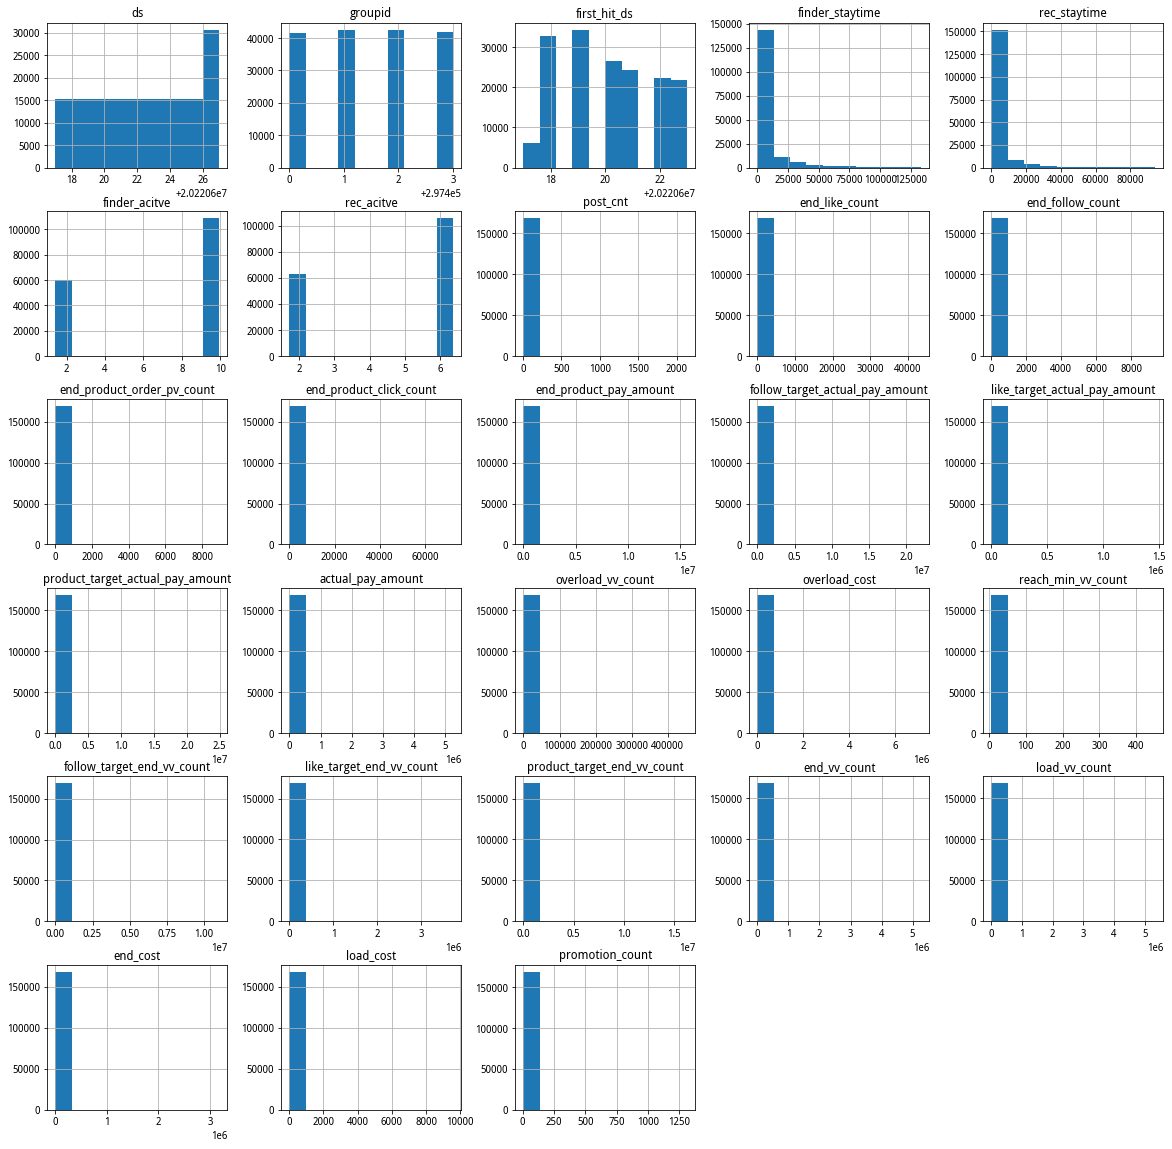

In [15]:
# 2. check distribution
df.hist(figsize=(20,20))

<AxesSubplot:xlabel='finder_staytime', ylabel='Density'>

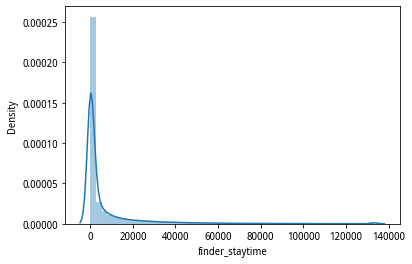

In [18]:
# 查看连续变量的分布
sns.distplot(df["finder_staytime"])

<AxesSubplot:xlabel='groupid', ylabel='count'>

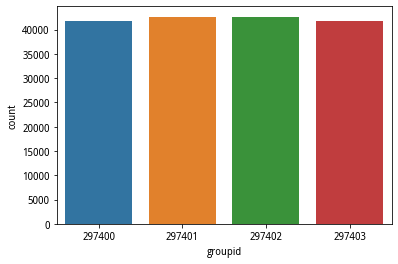

In [19]:
# 查看分类变量的不同组的数量
sns.countplot(df["groupid"])

## 2. Bivariate analysis

In [ ]:
# 1. numeric/ numeric
# (1) correlation

In [21]:
np.round(df.corr(),3)

,ds,groupid,first_hit_ds,finder_staytime,rec_staytime,finder_acitve,rec_acitve,post_cnt,end_like_count,end_follow_count,...,overload_cost,reach_min_vv_count,follow_target_end_vv_count,like_target_end_vv_count,product_target_end_vv_count,end_vv_count,load_vv_count,end_cost,load_cost,promotion_count
ds,1.000,-0.000,-0.000,-0.022,-0.015,-0.063,-0.063,-0.048,0.000,-0.001,...,-0.026,-0.002,-0.000,-0.010,0.003,-0.001,-0.001,-0.003,-0.003,-0.031
groupid,-0.000,1.000,0.021,-0.001,0.000,-0.002,-0.002,-0.002,-0.001,0.003,...,-0.002,-0.006,-0.004,-0.004,-0.010,-0.013,-0.013,-0.013,-0.013,-0.005
first_hit_ds,-0.000,0.021,1.000,-0.002,-0.003,0.006,0.007,0.038,-0.025,-0.012,...,-0.031,-0.052,-0.003,-0.018,-0.033,-0.055,-0.055,-0.057,-0.057,-0.053
finder_staytime,-0.022,-0.001,-0.002,1.000,0.757,0.303,0.308,0.103,0.075,0.052,...,0.058,0.075,0.045,0.052,0.032,0.059,0.059,0.060,0.060,0.073
rec_staytime,-0.015,0.000,-0.003,0.757,1.000,0.258,0.269,0.056,0.042,0.018,...,0.030,0.060,0.008,0.028,0.026,0.030,0.030,0.030,0.030,0.060
finder_acitve,-0.063,-0.002,0.006,0.303,0.258,1.000,0.949,0.113,0.026,0.018,...,0.028,0.042,0.011,0.020,0.019,0.038,0.038,0.038,0.038,0.057
rec_acitve,-0.063,-0.002,0.007,0.308,0.269,0.949,1.000,0.112,0.027,0.013,...,0.029,0.043,0.009,0.020,0.020,0.036,0.036,0.037,0.037,0.058
post_cnt,-0.048,-0.002,0.038,0.103,0.056,0.113,0.112,1.000,0.023,0.021,...,0.043,0.030,0.024,0.020,0.009,0.031,0.031,0.031,0.031,0.068
end_like_count,0.000,-0.001,-0.025,0.075,0.042,0.026,0.027,0.023,1.000,0.019,...,0.062,0.100,0.019,0.641,0.010,0.190,0.190,0.189,0.189,0.117
end_follow_count,-0.001,0.003,-0.012,0.052,0.018,0.018,0.013,0.021,0.019,1.000,...,0.172,0.050,0.758,0.011,0.000,0.387,0.387,0.392,0.392,0.047


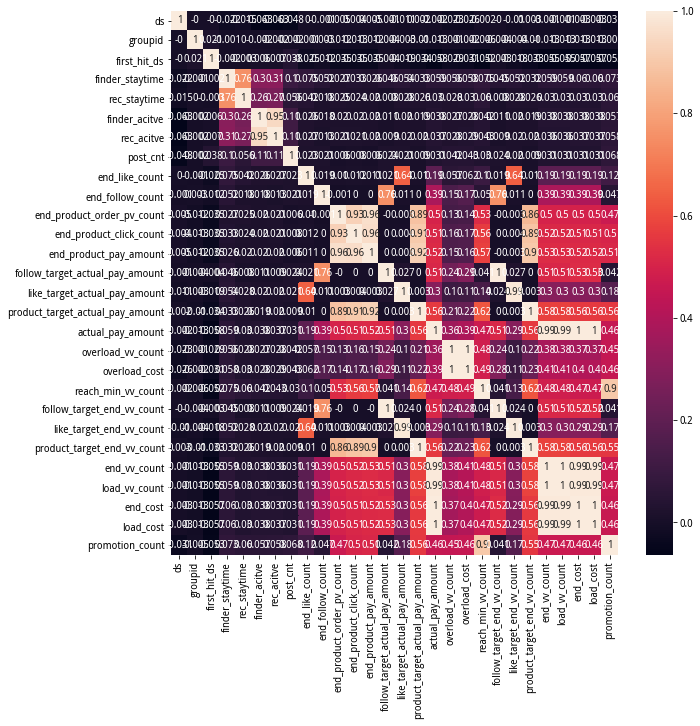

In [33]:
# heat map
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df.corr(),3),annot=True)
plt.show()

In [ ]:
# 2. 

In [ ]:
# 2. 查看数据的均值和显著性
# 将数据分类
date_cols=["ds","first_hit_ds"]
cate_cols=["anonymous","groupid"]
rec_and_finder_col=["finder_staytime","rec_staytime","finder_acitve","rec_acitve","post_cnt"]   #发现页/推荐页-日活和平均停留时长
end_col=["end_like_count","end_follow_count","end_product_order_pv_count","end_product_click_count","end_product_pay_amount"]
real_amount_col=["follow_target_actual_pay_amount","like_target_actual_pay_amount","product_target_actual_pay_amount",
                "actual_pay_amount"]
overload_col =["overload_vv_count","overload_cost"]
vv_col=["reach_min_vv_count","follow_target_end_vv_count","like_target_end_vv_count","product_target_end_vv_count",
       "end_vv_count","load_vv_count"]
cost_col=["end_cost","load_cost","promotion_count"]
Y_col=rec_and_finder_col + end_col + real_amount_col + overload_col + vv_col + cost_col

1. 截面数据均值和显著性

In [145]:
# 截面数据均值
data=pd.DataFrame()
groups=[297400,297401,297402,297403]  # 列

for col in Y_col:    # 行
    for i in range(len(groups)):   # 列
        data.loc[col,groups[i]]= tfinder.groupby("groupid")[col].mean()[groups[i]]  

# print(data.head(5))
# data.to_excel("finder_ATE.xls")

                      297400       297401       297402       297403
finder_staytime  7277.277135  7182.833618  7458.773586  7137.324915
rec_staytime     3148.964543  3119.691417  3193.836375  3135.164934
finder_acitve       6.967203     6.874427     6.908314     6.925710
rec_acitve          4.661709     4.612292     4.637251     4.640353
post_cnt           10.708435    10.793847    11.160326    10.425349


In [138]:
# 截面数据：ATE
finder_ATE= data
#print(finder_ATE)

for i in range(len(finder_ATE)):
    finder_ATE.loc[finder_ATE.index[i],"297401_ATE"]= (finder_ATE.loc[finder_ATE.index[i],297401]-finder_ATE.loc[finder_ATE.index[i],297400])
    finder_ATE.loc[finder_ATE.index[i],"297402_ATE"]= (finder_ATE.loc[finder_ATE.index[i],297402]-finder_ATE.loc[finder_ATE.index[i],297400])
    finder_ATE.loc[finder_ATE.index[i],"297403_ATE"]= (finder_ATE.loc[finder_ATE.index[i],297403]-finder_ATE.loc[finder_ATE.index[i],297400])
# print(finder_ATE.head(5))

                      297400       297401       297402       297403  \
finder_staytime  7277.277135  7182.833618  7458.773586  7137.324915   
rec_staytime     3148.964543  3119.691417  3193.836375  3135.164934   
finder_acitve       6.967203     6.874427     6.908314     6.925710   
rec_acitve          4.661709     4.612292     4.637251     4.640353   
post_cnt           10.708435    10.793847    11.160326    10.425349   

                 297401_ATE  297402_ATE  297403_ATE  
finder_staytime  -94.443518  181.496451 -139.952220  
rec_staytime     -29.273126   44.871832  -13.799610  
finder_acitve     -0.092776   -0.058889   -0.041493  
rec_acitve        -0.049417   -0.024458   -0.021356  
post_cnt           0.085412    0.451891   -0.283087  


In [151]:
# # 截面数据: p值
# data0_numerator= (tfinder.where(tfinder.groupid==297400)["rec_staytime"].dropna()).tolist()
# data0=pd.DataFrame()
# for i in range(len(data0_numerator)-2):
#     data0.loc[i,"groupid"]= 0
#     data0.loc[i,"numerator"]=data0_numerator[i]
#     data0.loc[i,"denominator"]= 1
# # 297401    
# data1_numerator= (tfinder.where(tfinder.groupid==297401)["rec_staytime"].dropna()).tolist()
# data1=pd.DataFrame()
# for i in range(len(data1_numerator)):
#     data1.loc[i, "groupid"] = 1
#     data1.loc[i, "numerator"] = data1_numerator[i]
#     data1.loc[i, "denominator"] = 1

# data=pd.concat([data0,data1])
# p1= sharp_null_hypothesis_pvalue(data)
# print("p1:",p1)

# # 297402
# data2_numerator= (tfinder.where(tfinder.groupid==297402)["rec_staytime"].dropna()).tolist()
# data2=pd.DataFrame()
# for i in range(len(data2_numerator)):
#     data2.loc[i, "groupid"] = 1
#     data2.loc[i, "numerator"] = data2_numerator[i]
#     data2.loc[i, "denominator"] = 1

# data=pd.concat([data0,data2])
# p2= sharp_null_hypothesis_pvalue(data)
# print("p2:",p2)

# # 297403
# data3_numerator= (tfinder.where(tfinder.groupid==297403)["rec_staytime"].dropna()).tolist()
# data3=pd.DataFrame()
# for i in range(len(data3_numerator)):
#     data3.loc[i, "groupid"] = 1
#     data3.loc[i, "numerator"] = data3_numerator[i]
#     data3.loc[i, "denominator"] = 1

# data=pd.concat([data0,data3])
# p3= sharp_null_hypothesis_pvalue(data)
# print("p3:",p3)

KeyboardInterrupt: 

In [153]:
# # delta方法计算P值
for i in range(len(finder_ATE)):
    # 297400
    content_c=(tfinder.where(tfinder.groupid==297400)[finder_ATE.index[i]].dropna()).tolist()
    count_c=[1 for _ in range(len(content_c))]
    # 297401
    content_t1=(tfinder.where(tfinder.groupid==297401)[finder_ATE.index[i]].dropna()).tolist()
    count_t1=[1 for _ in range(len(content_t1))]
    M_c=Metric(content_c,count_c)
    M_t=Metric(content_t1,count_t1)
    p1= Ttest(M_c,M_t).pvalue()
    # print("p1:",p1)
    # 297402
    content_t2=(tfinder.where(tfinder.groupid==297402)[finder_ATE.index[i]].dropna()).tolist()
    count_t2=[1 for _ in range(len(content_t2))]
    M_c=Metric(content_c,count_c)
    M_t=Metric(content_t2,count_t2)
    p2= Ttest(M_c,M_t).pvalue()
    # print("p2:",p2)
    # 297403
    content_t3=(tfinder.where(tfinder.groupid==297403)[finder_ATE.index[i]].dropna()).tolist()
    count_t3=[1 for _ in range(len(content_t3))]
    M_c=Metric(content_c,count_c)
    M_t=Metric(content_t3,count_t3)
    p3= Ttest(M_c,M_t).pvalue()
    # print("p3:",p3)
    finder_ATE.loc[finder_ATE.index[i],"297401_p"]=p1
    finder_ATE.loc[finder_ATE.index[i],"297402_p"]=p2
    finder_ATE.loc[finder_ATE.index[i],"297403_p"]=p3

# print(finder_ATE.head(5))
finder_ATE.to_excel("finder_ATE.xls")

                      297400       297401       297402       297403  \
finder_staytime  7277.277135  7182.833618  7458.773586  7137.324915   
rec_staytime     3148.964543  3119.691417  3193.836375  3135.164934   
finder_acitve       6.967203     6.874427     6.908314     6.925710   
rec_acitve          4.661709     4.612292     4.637251     4.640353   
post_cnt           10.708435    10.793847    11.160326    10.425349   

                 297401_ATE  297402_ATE  297403_ATE  297401_p  297402_p  \
finder_staytime  -94.443518  181.496451 -139.952220  0.436875  0.139653   
rec_staytime     -29.273126   44.871832  -13.799610  0.637870  0.469947   
finder_acitve     -0.092776   -0.058889   -0.041493  0.000959  0.035721   
rec_acitve        -0.049417   -0.024458   -0.021356  0.001451  0.114279   
post_cnt           0.085412    0.451891   -0.283087  0.596811  0.010039   

                 297403_p  
finder_staytime  0.248297  
rec_staytime     0.825711  
finder_acitve    0.140727  
rec_acitve

2. 面板数据均值

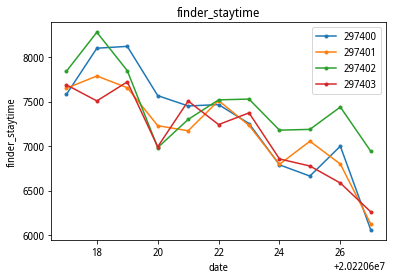

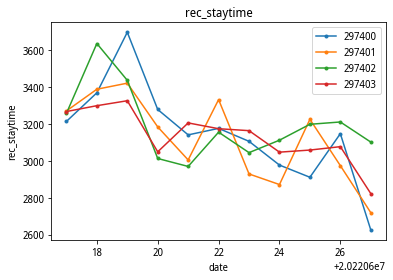

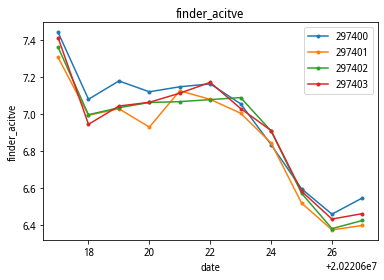

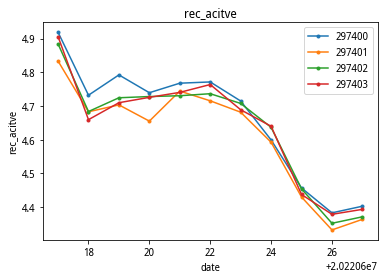

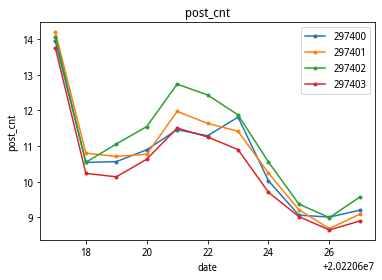

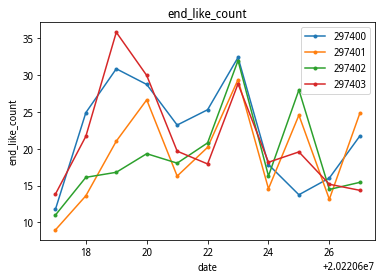

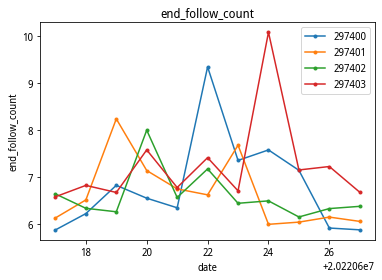

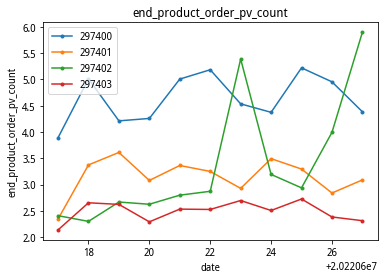

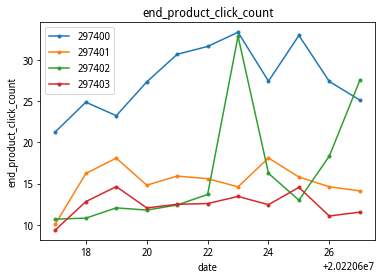

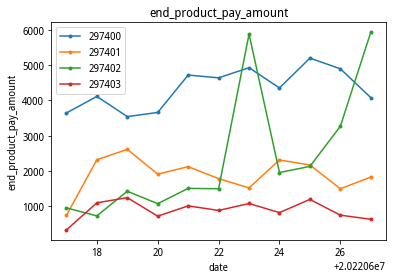

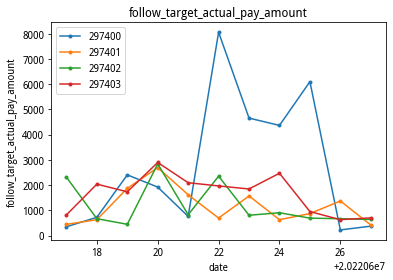

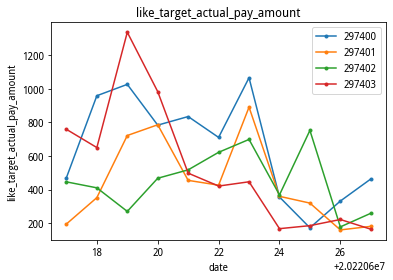

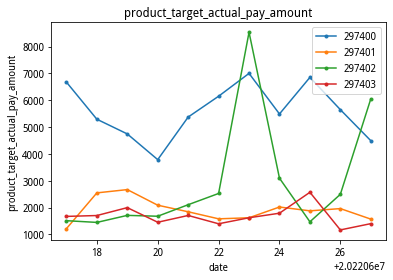

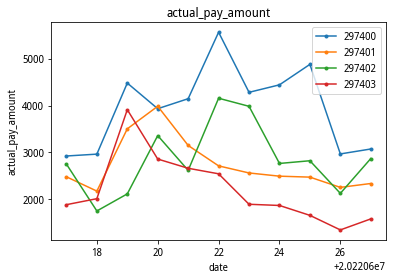

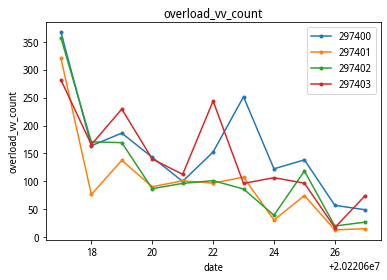

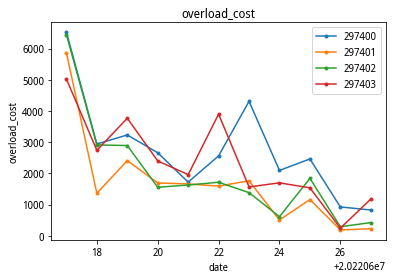

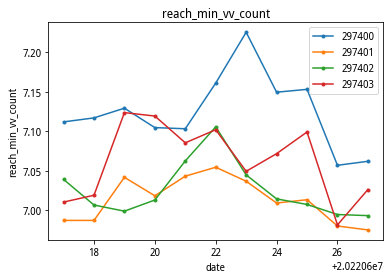

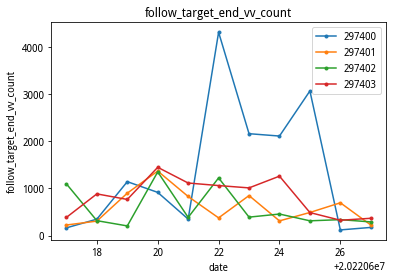

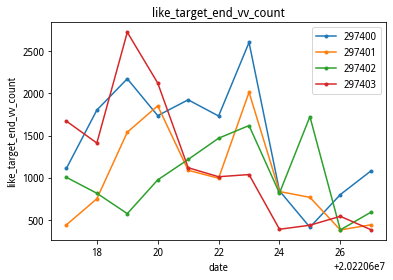

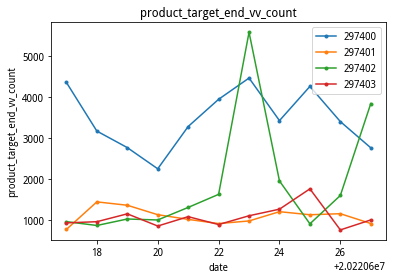

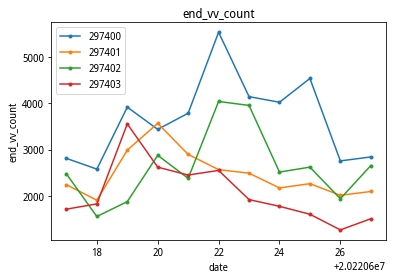

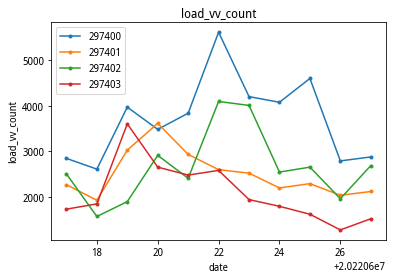

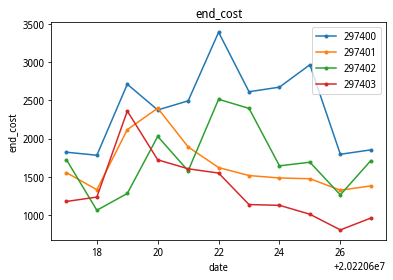

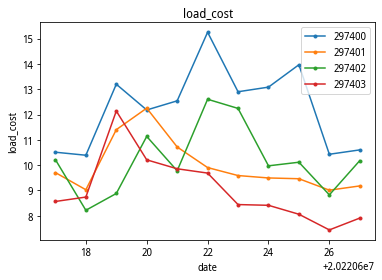

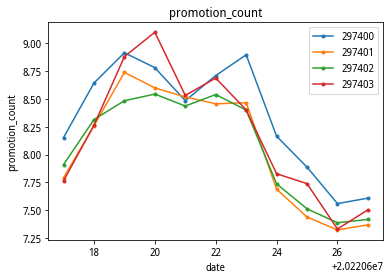

In [155]:
# (2) 面板数据    
data1=pd.DataFrame()
groups=["date","297400","297401","297402","297403"]
date= [20220600+i for i in range(17,28)]

for col in Y_col:
    for j in range(len(date)):
        data1.loc[date[j],"date"]= date[j]
        data1.loc[date[j],"297400"]= tfinder.where(tfinder.groupid==297400).groupby("ds")[col].mean()[date[j]]  
        data1.loc[date[j],"297401"]= tfinder.where(tfinder.groupid==297401).groupby("ds")[col].mean()[date[j]]  
        data1.loc[date[j],"297402"]= tfinder.where(tfinder.groupid==297402).groupby("ds")[col].mean()[date[j]] 
        data1.loc[date[j],"297403"]= tfinder.where(tfinder.groupid==297403).groupby("ds")[col].mean()[date[j]]  
    data1.plot.line(x=None,y=["297400","297401","297402","297403"],marker=".")
    plt.xlabel("date")
    plt.ylabel(f"{col}")
    plt.title(f"{col}")
    plt.savefig(f"{col}.png")
    #plt.show()
# 

Index(['297400', '297401', '297402', '297403'], dtype='object')
